In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 100
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

vx = np.zeros(len(x))
vy = np.zeros(len(x))
vz = np.zeros(len(x))


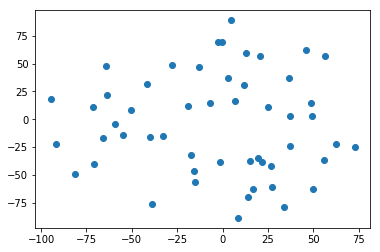

In [3]:
plt.plot(x,y,'o')

In [4]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)

52


In [5]:
from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

In [6]:
xx=x
yy=y
zz=z

vxx=vx
vyy=vy
vzz=vz

axx=ax
ayy=ay
azz=az
        

In [7]:
h = 0.0001

for k in range(0,10000):
       
    k1x = vxx
    k2x = vxx + k1x*h/2.
    k3x = vxx + k2x*h/2.
    k4x = vxx + k3x*h
    
    k1y = vyy
    k2y = vyy + k1y*h/2.
    k3y = vyy + k2y*h/2.
    k4y = vyy + k3y*h
    
    k1z = vzz
    k2z = vzz + k1z*h/2.
    k3z = vzz + k2z*h/2.
    k4z = vzz + k3z*h
    
    k1vx = axx
    k2vx = axx + k1vx*h/2.
    k3vx = axx + k2vx*h/2.
    k4vx = axx + k3vx*h
    
    k1vy = ayy
    k2vy = ayy + k1vy*h/2.
    k3vy = ayy + k2vy*h/2.
    k4vy = ayy + k3vy*h
    
    k1vz = azz
    k2vz = azz + k1vz*h/2.
    k3vz = azz + k2vz*h/2.
    k4vz = azz + k3vz*h
    
    
    xx = xx + h*(k1x/6. + k2x/3. + k3x/3. + k4x/6.)
    yy = yy + h*(k1y/6. + k2y/3. + k3y/3. + k4y/6.)
    zz = zz + h*(k1z/6. + k2z/3. + k3z/3. + k4z/6.)
    
    vxx = vxx + h*(k1vx/6. + k2vx/3. + k3vx/3. + k4vx/6.)
    vyy = vyy + h*(k1vy/6. + k2vy/3. + k3vy/3. + k4vy/6.)
    vzz = vzz + h*(k1vz/6. + k2vz/3. + k3vz/3. + k4vz/6.)
    
    axx,ayy,azz = aceleracion.a_str(m,xx,yy,zz,len(m))
    

KeyboardInterrupt: 

In [ ]:
plt.plot(xx,yy,'o',color='r')
plt.plot(x,y,'o',color='b')